In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, # 주어진 이밎 크기를 설정
                                   horizontal_flip=True, # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range=0.1, # 전체 크기의 15% 범위에서 좌우로 이동함
                                   height_shift_range=0.1 # 마찬가지로 위아래로 이동함
                                   )

In [3]:
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32,(3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])
ealry_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator,
                    validation_steps=10,
                    callbacks=[ealry_stopping_callback])

Epoch 1/100
32/32 [==============================] - 4s 79ms/step - loss: 0.6992 - accuracy: 0.5063 - val_loss: 0.6899 - val_accuracy: 0.5600
Epoch 2/100
32/32 [==============================] - 2s 74ms/step - loss: 0.6905 - accuracy: 0.4812 - val_loss: 0.6905 - val_accuracy: 0.4000
Epoch 3/100
32/32 [==============================] - 2s 74ms/step - loss: 0.6786 - accuracy: 0.6250 - val_loss: 0.6644 - val_accuracy: 0.7200
Epoch 4/100
32/32 [==============================] - 2s 75ms/step - loss: 0.6601 - accuracy: 0.6500 - val_loss: 0.6266 - val_accuracy: 0.5800
Epoch 5/100
32/32 [==============================] - 3s 82ms/step - loss: 0.6460 - accuracy: 0.6438 - val_loss: 0.5782 - val_accuracy: 0.8000
Epoch 6/100
32/32 [==============================] - 2s 73ms/step - loss: 0.5456 - accuracy: 0.7875 - val_loss: 0.4631 - val_accuracy: 0.7600
Epoch 7/100
32/32 [==============================] - 3s 84ms/step - loss: 0.5010 - accuracy: 0.7563 - val_loss: 0.3893 - val_accuracy: 0.8800
Epoch 

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

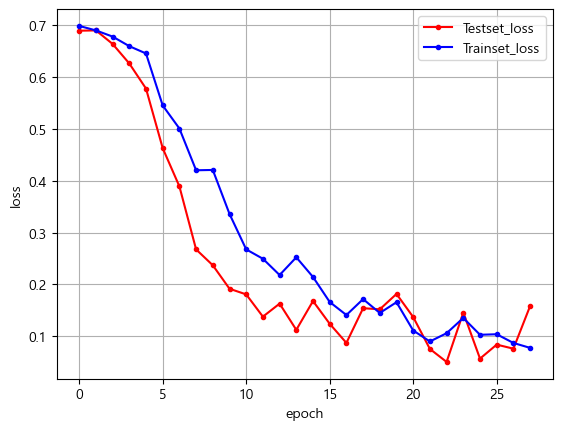

In [8]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()